In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import folium
from folium.plugins import MarkerCluster

In [63]:

file_path = 'C:/Users/ctcha/ProjektDatamining/Daten/train.csv'
daten = pd.read_csv(file_path)
print(daten)

                      Dates                Category  \
0       2015-05-13 23:53:00                WARRANTS   
1       2015-05-13 23:53:00          OTHER OFFENSES   
2       2015-05-13 23:33:00          OTHER OFFENSES   
3       2015-05-13 23:30:00           LARCENY/THEFT   
4       2015-05-13 23:30:00           LARCENY/THEFT   
...                     ...                     ...   
878044  2003-01-06 00:15:00                 ROBBERY   
878045  2003-01-06 00:01:00           LARCENY/THEFT   
878046  2003-01-06 00:01:00           LARCENY/THEFT   
878047  2003-01-06 00:01:00               VANDALISM   
878048  2003-01-06 00:01:00  FORGERY/COUNTERFEITING   

                                         Descript  DayOfWeek PdDistrict  \
0                                  WARRANT ARREST  Wednesday   NORTHERN   
1                        TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
2                        TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
3                    GRAND THEFT FROM L

In [64]:
print(daten.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB
None


In [65]:
#Fehlende Daten untersuchen
print(daten.describe())

                   X              Y
count  878049.000000  878049.000000
mean     -122.422616      37.771020
std         0.030354       0.456893
min      -122.513642      37.707879
25%      -122.432952      37.752427
50%      -122.416420      37.775421
75%      -122.406959      37.784369
max      -120.500000      90.000000


In [66]:
daten.max()

Dates         2015-05-13 23:53:00
Category              WEAPON LAWS
Descript              YOUTH COURT
DayOfWeek               Wednesday
PdDistrict             TENDERLOIN
Resolution              UNFOUNDED
Address         ZOE ST / WELSH ST
X                          -120.5
Y                            90.0
dtype: object

In [67]:
daten.min()

Dates             2003-01-06 00:01:00
Category                        ARSON
Descript         ABANDONMENT OF CHILD
DayOfWeek                      Friday
PdDistrict                    BAYVIEW
Resolution             ARREST, BOOKED
Address       0 Block of  HARRISON ST
X                         -122.513642
Y                           37.707879
dtype: object

In [68]:
print(daten.isnull().sum())

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64


In [69]:
for column in daten.columns:
    unique_values = daten[column].unique()
    print(f'Unique values in {column}: {unique_values}')

Unique values in Dates: ['2015-05-13 23:53:00' '2015-05-13 23:33:00' '2015-05-13 23:30:00' ...
 '2003-01-06 00:20:00' '2003-01-06 00:15:00' '2003-01-06 00:01:00']
Unique values in Category: ['WARRANTS' 'OTHER OFFENSES' 'LARCENY/THEFT' 'VEHICLE THEFT' 'VANDALISM'
 'NON-CRIMINAL' 'ROBBERY' 'ASSAULT' 'WEAPON LAWS' 'BURGLARY'
 'SUSPICIOUS OCC' 'DRUNKENNESS' 'FORGERY/COUNTERFEITING' 'DRUG/NARCOTIC'
 'STOLEN PROPERTY' 'SECONDARY CODES' 'TRESPASS' 'MISSING PERSON' 'FRAUD'
 'KIDNAPPING' 'RUNAWAY' 'DRIVING UNDER THE INFLUENCE'
 'SEX OFFENSES FORCIBLE' 'PROSTITUTION' 'DISORDERLY CONDUCT' 'ARSON'
 'FAMILY OFFENSES' 'LIQUOR LAWS' 'BRIBERY' 'EMBEZZLEMENT' 'SUICIDE'
 'LOITERING' 'SEX OFFENSES NON FORCIBLE' 'EXTORTION' 'GAMBLING'
 'BAD CHECKS' 'TREA' 'RECOVERED VEHICLE' 'PORNOGRAPHY/OBSCENE MAT']
Unique values in Descript: ['WARRANT ARREST' 'TRAFFIC VIOLATION ARREST'
 'GRAND THEFT FROM LOCKED AUTO' 'GRAND THEFT FROM UNLOCKED AUTO'
 'STOLEN AUTOMOBILE' 'PETTY THEFT FROM LOCKED AUTO'
 'MISCELLANEOUS IN

In [70]:
null_counts = daten.isnull().sum()
print('Null counts for each column:')
print(null_counts)

Null counts for each column:
Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64


C:\Users\ctcha\AppData\Local\Temp\ipykernel_13324\2305728853.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=daten, order=daten['Category'].value_counts().index, palette='viridis')


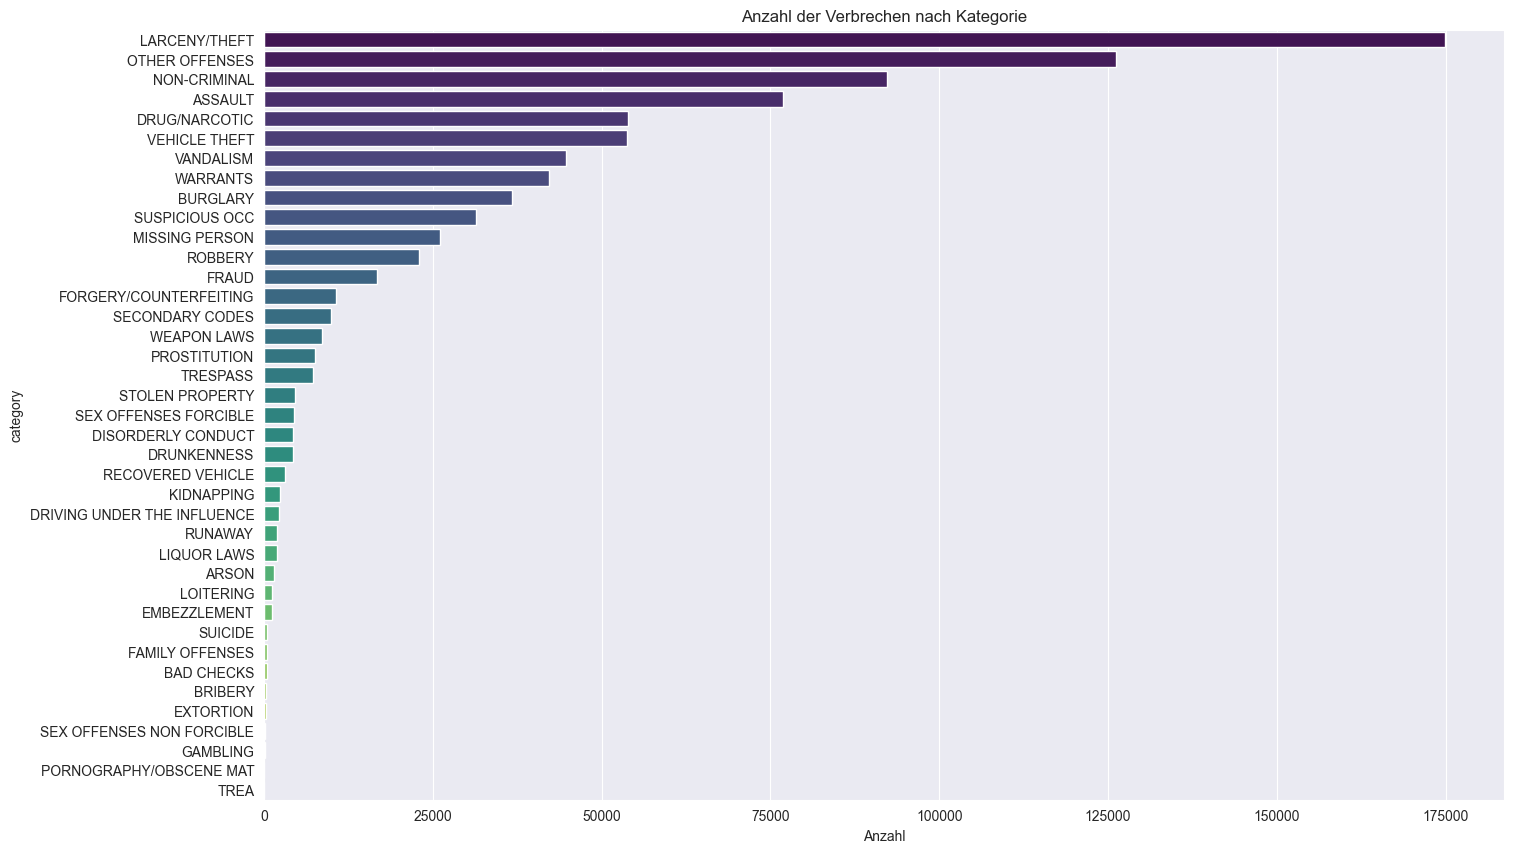

In [71]:
plt.figure(figsize=(16, 10))
sns.countplot(y='Category', data=daten, order=daten['Category'].value_counts().index, palette='viridis')
plt.title('Anzahl der Verbrechen nach Kategorie')
plt.ylabel('category')
plt.xlabel('Anzahl')
plt.show()

In [72]:
# Extrahieren Sie den Wochentag aus dem Datum
daten['DayOfWeek'] = daten['Dates'].dt.day_name()

# Zählen Sie die Anzahl der Verbrechen pro Wochentag
crime_by_day = daten.groupby('DayOfWeek')['Descript'].count().reset_index()

# Visualisierung
plt.figure(figsize=(12, 8))
sns.barplot(x='DayOfWeek', y='Descript', data=crime_by_day, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Anzahl der Verbrechen nach Wochentag')
plt.xlabel('Wochentag')
plt.ylabel('Anzahl der Verbrechen')
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
# Create a boxplot with 'DayOfWeek' as 'hue' and set 'legend' to False
sns.boxplot(x="DayOfWeek", y="X", hue="DayOfWeek", data=daten, palette="muted", showfliers=False)

# Display the boxplot
plt.show()

In [ ]:
daten['DayOfWeek'] = daten['Dates'].dt.day_name()

# Erstellen Sie einen Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='DayOfWeek', y='Descript', data=daten, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Boxplot der Anzahl der Verbrechen nach Wochentag')
plt.xlabel('Wochentag')
plt.ylabel('Anzahl der Verbrechen')
plt.show()

In [ ]:
 # Verwenden Sie LabelEncoder auf numerische Spalten
label_encoder = LabelEncoder()
daten['Category'] = label_encoder.fit_transform(daten['Category'])

# Erstellen Sie die Korrelationsmatrix (wenn Sie nur numerische Spalten verwenden)
numeric_data = daten.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_data.corr()

# Visualisierung der Korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.boxplot(x="DayOfWeek", y="X", data=daten, palette="muted")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korrelationsmatrix')
plt.show()

In [ ]:
#kleine Visualisierungen
print(correlation_matrix.dtypes)
sns.countplot(x="Category", data=daten, palette="viridis")
plt.xticks(rotation=90)
plt.show()

sns.boxplot(x="DayOfWeek", y="X", data=daten, palette="muted")
plt.show()

In [ ]:
plt.figure(figsize=(16, 10))
sns.boxplot(x='DayOfWeek', y='Address', hue='PdDistrict', data=daten, palette='viridis')
plt.title('Distribution of Crime Occurrence by Day of the Week and Police Department Districts')
plt.xlabel('Day of the Week')
plt.ylabel('Occurrence Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Police Department Districts', title_fontsize='15')
plt.show()

In [ ]:
# Visualisierung der Anzahl der Verbrechen pro Kategorie
plt.figure(figsize=(14, 8))
sns.countplot(y='Category', data=daten, order=daten['Category'].value_counts().index.astype(str))
plt.title('Anzahl der Verbrechen pro Kategorie')
plt.xlabel('Anzahl der Verbrechen')
plt.show()

In [ ]:

# Visualisierung der Anzahl der Verbrechen pro Wochentag
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=daten, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Anzahl der Verbrechen pro Wochentag')
plt.show()

# Visualisierung der Verteilung der Verbrechen in den Polizeibezirken
plt.figure(figsize=(14, 8))
sns.countplot(y='PdDistrict', data=daten, order=daten['PdDistrict'].value_counts().index)
plt.title('Verteilung der Verbrechen in den Polizeibezirken')
plt.show()

# Visualisierung der geografischen Verteilung der Verbrechen auf einer Karte
plt.figure(figsize=(12, 12))
sns.scatterplot(x='X', y='Y', data=daten, hue='PdDistrict', palette='viridis', alpha=0.3)
plt.title('Geografische Verteilung der Verbrechen')
plt.show()

In [ ]:
# Konvertieren Sie das Datumsformat
daten['Dates'] = pd.to_datetime(daten['Dates'])

# Wählen Sie numerische Spalten aus (in diesem Fall X und Y)
numeric_columns = ['X', 'Y']

# Erstellen Sie eine Korrelationsmatrix
correlation_matrix = daten[numeric_columns].corr()

# Visualisieren Sie die Korrelationsmatrix mit einem Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korrelationsmatrix der numerischen Variablen')
plt.show()

In [ ]:
#Zeitliche Verteilung der Verbrechen
plt.figure(figsize=(14, 8))
sns.countplot(y='Resolution', data=daten, order=daten['Resolution'].value_counts().index, palette='pastel')
plt.title('Verteilung der Auflösungen der Verbrechen')
plt.xlabel('Anzahl der Verbrechen')
plt.ylabel('Auflösung')
plt.show()

#Häufigkeit von Verbrechen in bestimmten Bereichen
plt.figure(figsize=(16, 10))
sns.countplot(x='DayOfWeek', hue='PdDistrict', data=daten, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='muted')
plt.title('Anzahl der Verbrechen pro Tag der Woche in verschiedenen Polizeibezirken')
plt.xlabel('Wochentag')
plt.ylabel('Anzahl der Verbrechen')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



In [ ]:
#Anzahl der Verbrechen pro Tag der Woche in verschiedenen Polizeibezirken
plt.figure(figsize=(16, 10))
sns.scatterplot(x='X', y='Y', data=daten, hue='Category', palette='viridis', alpha=0.5)
plt.title('Häufigkeit von Verbrechen in bestimmten Bereichen')
plt.xlabel('X-Koordinate')
plt.ylabel('Y-Koordinate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
#Zeitliche Verteilung der Verbrechen
plt.figure(figsize=(14, 8))
daten['Hour'] = daten['Dates'].dt.hour
sns.countplot(x='Hour', data=daten, palette='Set2')
plt.title('Stündliche Verteilung der Verbrechen')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Verbrechen')
plt.show()


In [ ]:


# Filtern Sie Daten mit fehlenden Adressinformationen
daten = daten.dropna(subset=['Address'])

# Erstellen Sie eine Karte
crime_map = folium.Map(location=[daten['Y'].mean(), daten['X'].mean()], zoom_start=12)

# Fügen Sie Marker mit Cluster hinzu
marker_cluster = MarkerCluster().add_to(crime_map)

for index, row in daten.iterrows():
    folium.Marker([row['Y'], row['X']], popup=row['Address']).add_to(marker_cluster)

# Speichern Sie die Karte als HTML-Datei oder zeigen Sie sie direkt an
crime_map.save('crime_map.html')

In [ ]:
# Verbrechen pro Monat
plt.figure(figsize=(12, 8))
sns.countplot(x='Month', data=daten, palette='viridis')
plt.title('Verbrechen pro Monat')
plt.xlabel('Monat')
plt.ylabel('Anzahl der Verbrechen')
plt.show()

# Verbrechen pro Jahr
plt.figure(figsize=(12, 8))
sns.countplot(x='Year', data=daten, palette='viridis')
plt.title('Verbrechen pro Jahr')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Verbrechen')
plt.show()


In [ ]:
# Korrelationsmatrix erstellen
correlation_matrix = daten.corr()

# Visualisierung der Korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korrelationsmatrix')
plt.show()

In [ ]:
Welche Monate haben tendenziell höhere Verbrechensraten?
Wie hat sich die Anzahl der Verbrechen im Laufe der Jahre verändert?
Welche Gebiete weisen die höchste Konzentration von Verbrechen auf der Weltkarte auf?
Gibt es signifikante Korrelationen zwischen den Merkmalen? Wenn ja, welche?